## Classical fit with kafe2

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from kafe2 import XYContainer, XYFit, Plot
# Create an XYContainer object to hold the xy data for the fit.
xy_data = XYContainer(x_data=[1.0, 2.0, 3.0, 4.0],
                      y_data=[2.3, 4.2, 7.5, 9.4])

In [3]:
xy_data.add_error(axis='x', err_val=0.3)  # +/-0.3 for all data points in x-direction
xy_data.add_error(axis='y', err_val=0.15, relative=True)  # +/-15% for all points in y-direction

'WSYXeSNI'

In [4]:
my_fit = XYFit(xy_data=xy_data)
results = my_fit.do_fit()

In [5]:
plot = Plot([my_fit])

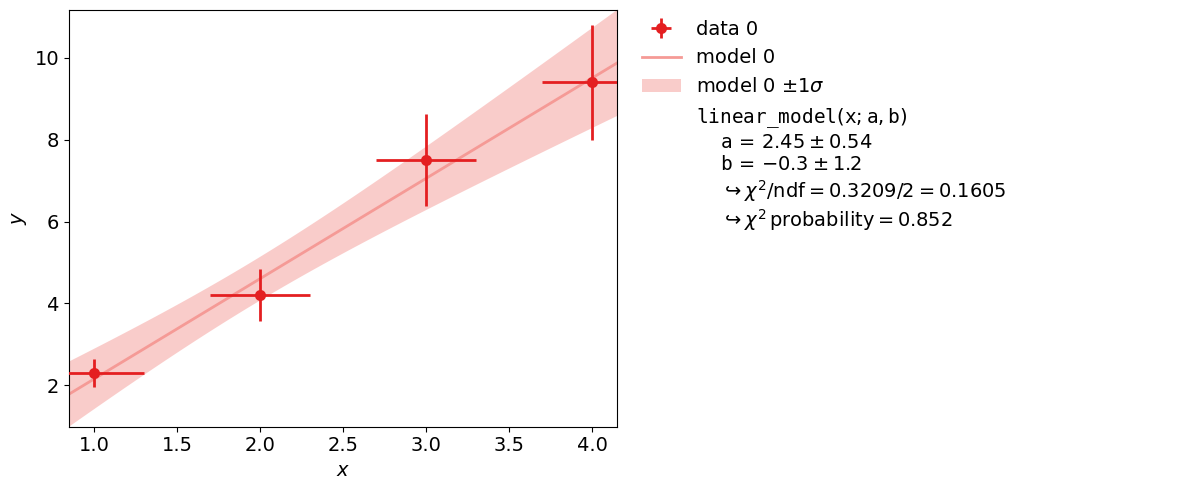

In [34]:
%matplotlib inline 
erg = plot.plot()

plt.show()

## Extract the error band from the fit-object

In [26]:
def error_band(fit, n_points=100):
        """one-dimensional array representing the uncertainty band around the model function"""
        if not fit.did_fit:
            print('Fit did not succeded')
            return None, None, None
        _xmin, _xmax = fit.x_range
        
        _model_line_x = np.linspace(_xmin, _xmax, n_points)
        _model_line_y = fit.eval_model_function(_model_line_x)
        _band_x = _model_line_x
        if fit.parameter_cov_mat is None:
            return _model_line_x, _model_line_y, np.zeros_like(_band_x)

        _f_deriv_by_params = fit.eval_model_function_derivative_by_parameters(
            x=_band_x,
            model_parameters=fit.parameter_values)
        # here: df/dp[par_idx]|x=x[x_idx] = _f_deriv_by_params[par_idx][x_idx]

        _f_deriv_by_params = _f_deriv_by_params.T
        # here: df/dp[par_idx]|x=x[x_idx] = _f_deriv_by_params[x_idx][par_idx]

        _band_y = np.zeros_like(_band_x)
        _n_poi = len(fit.parameter_values)
        for _x_idx, _x_val in enumerate(_band_x):
            _p_res = _f_deriv_by_params[_x_idx]
            _band_y[_x_idx] = _p_res.dot(fit.parameter_cov_mat[:_n_poi, :_n_poi]).dot(_p_res)

        return _model_line_x, _model_line_y, np.sqrt(_band_y)
    
model_x, model_y, band_y = error_band(my_fit)

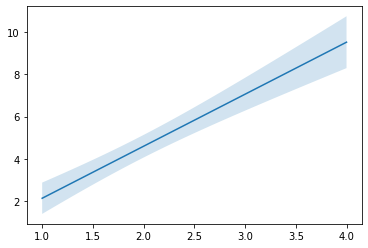

In [33]:
%matplotlib inline

import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.plot(model_x, model_y)

ax.fill_between(model_x, model_y-band_y, model_y+band_y, alpha=0.2)